In [135]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tqdm import tqdm_notebook

import os

import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport

In [136]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, TimeSeriesSplit

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

random_state=17

from scipy.stats import skew

In [137]:
dataset = pd.read_excel('AirQualityUCI.xlsx')

In [138]:
#dataset.head()

In [139]:
#dataset.info()

In [140]:
dataset['Date'].max()

Timestamp('2005-04-04 00:00:00')

In [141]:
plt.figure(figsize = (100, 100))

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

In [142]:
corr = np.abs(dataset.corr())

Text(0.5,1,'Correlation matrix')

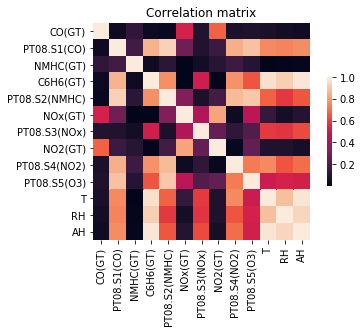

In [143]:
ax = sns. heatmap(corr, square = True, cbar_kws={"shrink": .5})
plt.title("Correlation matrix")

In [217]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
index,8991.0,4642.993104,2706.482068,0.000000,2288.500000,4642.000000,6970.500000,9356.000000
CO(GT),8991.0,0.982158,0.410699,0.095310,0.693147,0.916291,1.280934,2.557227
PT08.S1(CO),8991.0,6.985173,0.190860,6.474276,6.843483,6.969791,7.116597,7.621073
C6H6(GT),8991.0,2.182163,0.691711,0.138934,1.693217,2.223526,2.707282,4.170402
NOx(GT),8991.0,4.979270,0.870645,1.098612,4.189655,4.947340,5.638355,7.299797
PT08.S3(NOx),8991.0,6.684618,0.297650,5.777652,6.490534,6.692704,6.877554,7.894970
NO2(GT),8991.0,4.621125,0.430192,1.098612,4.454347,4.584967,4.890349,5.809943
PT08.S4(NO2),8991.0,1456.143486,346.204540,551.000000,1226.625000,1462.750000,1673.500000,2775.000000
PT08.S5(O3),8991.0,1022.780725,398.480897,221.000000,731.375000,963.250000,1273.375000,2522.750000
Season,8991.0,2.521855,1.328537,1.000000,1.000000,2.000000,4.000000,5.000000


In [145]:
dataset = dataset[dataset['C6H6(GT)'] != -200]


In [146]:
#dataset

In [147]:
#dataset.info()

In [148]:
dataset.drop('PT08.S2(NMHC)', axis = 1, inplace = True)

In [149]:
#dataset

In [150]:
dataset.drop('RH', axis = 1, inplace = True)

In [151]:
dataset.drop('AH', axis = 1, inplace = True)

In [152]:
dataset.drop('T', axis = 1, inplace = True)

In [153]:
#dataset

In [154]:
dataset[dataset == -200] = np.nan
dataset = dataset.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [155]:
skew_values = dataset.skew()
skewed = skew_values[skew_values > 0.75]
# cat_dataset = dataset.select_dtypes(['object'])

In [156]:
skewed_index = skewed.index
dataset[skewed_index] = np.log1p(dataset[skewed_index])

In [157]:
#cat_dataset.T
skewed = skew_values[skew_values < -0.75]
skewed_index = skewed.index
dataset[skewed_index] = np.log1p(dataset[skewed_index])

In [158]:
#skewed

In [159]:
#dataset

In [160]:
#dataset.skew()
#dataset


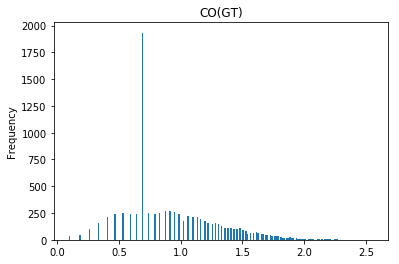

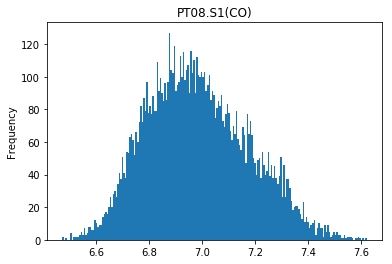

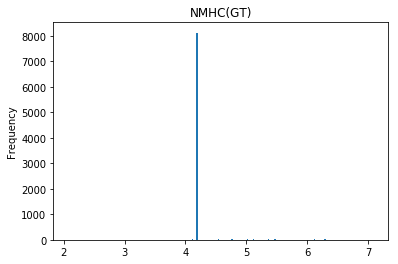

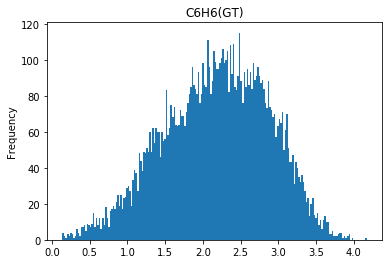

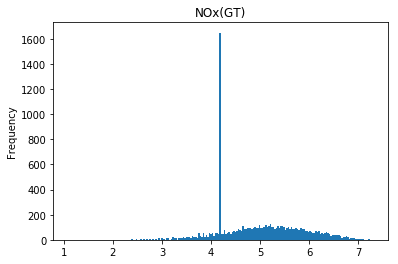

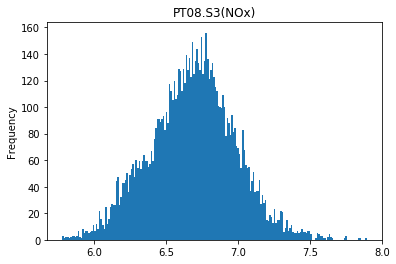

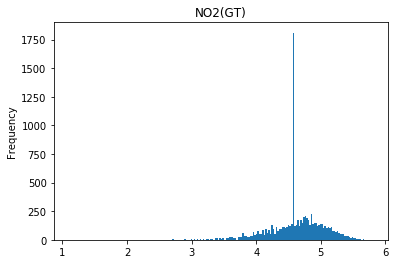

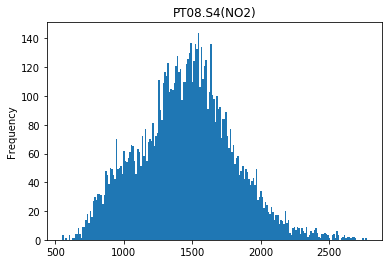

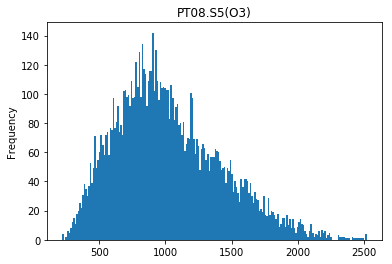

In [161]:
#list(dataset.columns)[1:]
#dataset[dataset.columns]
for i in list(dataset.columns)[2:]:
    plt.figure()
    plt.title(i)
    dataset[i].plot.hist(bins = 200, figsize = (6,4))
    

In [162]:
#dataset[dataset < 0].sum()

In [163]:
dataset.drop('NMHC(GT)', axis = 1, inplace = True)

In [234]:
#dataset['Month'] = dataset['Date']
def get_season(date):
    m = date.month
   # print(m)
    if m in (12,1, 2):
        return 4 #winter
    if m >=3 and m < 6:
        return 1 #spring
    if m >= 6 and m < 9:
        return 2 # summer
    if m >= 9 and m < 12:
        return 3 #fall
   # print (m)
    return 5
dataset['Season'] = dataset['Date'].apply(get_season) 

In [235]:
# Partition the dataset in train + validation sets
#X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.3, random_state = 0)
dataset_no_target = dataset.drop('C6H6(GT)', axis = 1)
target = dataset[['Date', 'C6H6(GT)']]

In [236]:
#target
#dataset
#dataset[dataset == np.nan].count()

# def get_months(d):
#     return d.month
# unique_months = dataset['Date'].apply(get_months).unique()
# unique_months

In [233]:
#dataset['Season'].unique()

array([1, 2, 3, 4])

In [259]:
X_train = dataset_no_target[dataset_no_target['Date'] < '2004-12-01']
X_test = dataset_no_target[dataset_no_target['Date'] >= '2004-12-01']
Y_train = target[target['Date'] < '2004-12-01']['C6H6(GT)']
Y_test = target[target['Date'] >= '2004-12-01']['C6H6(GT)']
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(Y_train.shape))
#print("y_val : " + str(y_val.shape))

X_train : (6218, 11)
X_test : (2773, 11)
y_train : (6218,)


In [260]:
scaler = StandardScaler()

In [261]:
X_train_scaled = scaler.fit_transform(X_train.drop(['Date', "Time"], axis =1))

In [262]:
X_test_scaled = scaler.fit_transform(X_test.drop(['Date', "Time"], axis =1))

In [263]:
#X_train_all = np.concatenate([X_train[['Date', 'Time']], X_train_scaled], axis = 1)  
#np.any(np.isnan(dataset))
#dataset = dataset.reset_index()

In [264]:
#X_train['Date'].shape
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 
           'neg_median_absolute_error', 'r2']

In [265]:
#X_train_scaled.shape

In [266]:
linreg = LinearRegression()

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(linreg, X_train_scaled, Y_train, cv=5, scoring=metric))
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [267]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

neg_mean_absolute_error -0.19612
neg_mean_squared_error -0.06341
neg_median_absolute_error -0.17293
r2 0.85700


In [268]:
clf = Ridge().fit(X_train_scaled,Y_train)

In [276]:
#X_train.info()

#np.sqrt(mean_squared_error(y_pred,Y_test))

0.3245703877564353

In [275]:
#Y_train
print(X_test.shape)

(2773, 11)


In [273]:
y_pred_df = pd.DataFrame(y_pred,columns=['target'])
y_pred_df.to_csv('ridge.csv', index=False) 